<a href="https://colab.research.google.com/github/namita-ach/SDS-Reviews/blob/main/t_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-On Tutorial: Understanding t-Distributions and Confidence Intervals

In this tutorial, we will explore the concept of t-distributions and how to visualize them using Python. We will also calculate confidence intervals based on t-scores.

---

## 1. Importing Necessary Libraries

We need to import the required libraries for statistical calculations and plotting.

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import t, norm
import numpy as np
import pandas as pd

## 2. Generating Data for t-Distributions
We will create a range of values for plotting the probability density function (PDF) of the t-distribution.

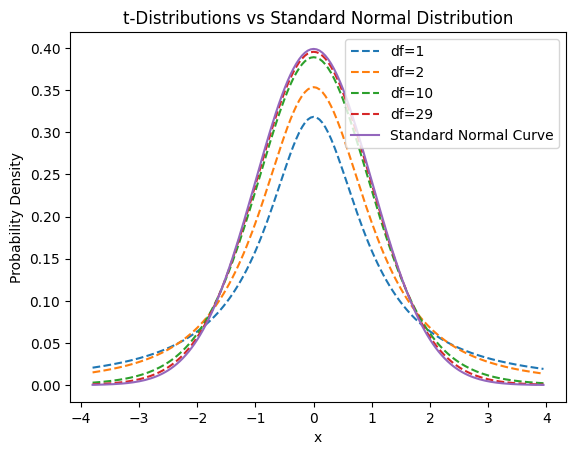

In [ ]:
# Create an array of values from -3.8 to 4 with increments of 1/20
x = np.arange(-3.8, 4, 1/20)

# Plotting t-distribution curves for different degrees of freedom
for i in [1, 2, 10, 29]:
    plt.plot(x, t.pdf(x, i), '--', label=f'df={i}')  # Plotting each t-distribution curve

# Plotting a standard normal curve for comparison
plt.plot(x, norm.pdf(x), label='Standard Normal Curve')
plt.legend(loc='upper right')
plt.title('t-Distributions vs Standard Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.show()

## 3. Creating a Function to Plot the t-Table
Next, we define a function t_table that takes sample size (n) and significance level (alpha) as parameters. This function plots the t-distribution and shades the critical regions based on the specified alpha level.

In [ ]:
def t_table(n, alpha):
    # Calculate the critical value for two-tailed test
    s = t.ppf(alpha / 2, n - 1)

    plt.figure(figsize=(8, 4))
    plt.plot(x, t.pdf(x, n - 1), color='red', label=f'df={n - 1}')

    # Define sections to fill (critical regions)
    section1 = np.arange(-5, s, 1/20.)
    section2 = np.arange(-s, 5, 1/20.)

    # Fill the critical regions in blue
    plt.fill_between(section1, t.pdf(section1, n - 1), color='blue')
    plt.fill_between(section2, t.pdf(section2, n - 1), color='blue')

    plt.xticks(np.arange(-5, 5, 0.5), rotation=45)
    plt.title('t-Distribution with Critical Regions')
    plt.legend(loc='upper right')
    plt.show()

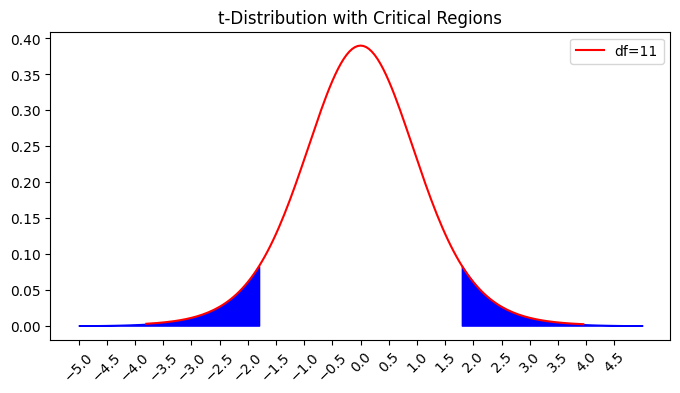

In [ ]:
# Call the function to plot the t-table with sample size and alpha level
t_table(12, 0.1)

## 4. Confidence Interval Calculation Function
Next, we define a function ci that calculates and visualizes the confidence interval based on a given t-score and sample size.

In [ ]:
x = np.arange(-7, 8, 1/20)

def ci(t_score, n):
    plt.figure(figsize=(8, 4))

    # Calculate the area under the curve (confidence level)
    area = t.cdf(t_score, n - 1) - t.cdf(-t_score, n - 1)
    print('Confidence Level:', area * 100)   # Print confidence level in percentage

    # Plotting the t-distribution curve
    plt.plot(x, t.pdf(x, n - 1), color='red', label=f'df={n - 1}')

    # Fill the area between -t_score and +t_score
    section = np.arange(-t_score, t_score, 1/20.)
    plt.fill_between(section, t.pdf(section, n - 1))

    plt.xticks(np.arange(-6, 7, 0.5), rotation=45)
    plt.title('Confidence Interval Visualization')
    plt.legend(loc='upper right')
    plt.show()

Confidence Level: 99.00004355246759


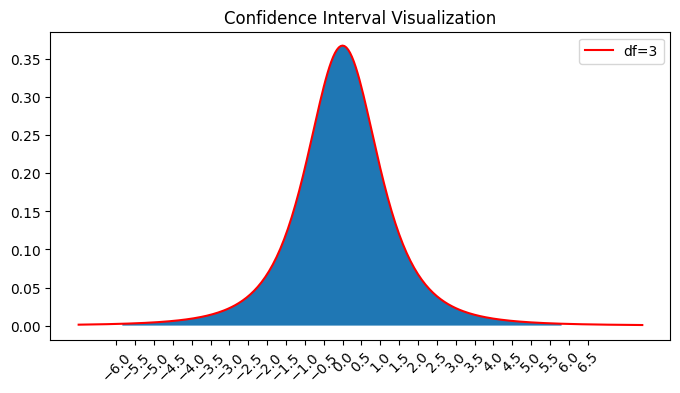

In [ ]:
# Call the function to visualize confidence interval with given t-score and sample size
ci(5.841, 4)

For more, go [here](https://namitalearns.substack.com).